# Pymaceuticals Inc.
---

### Analysis

The data comprehends the obseved values for 249 nevertheless there are some duplicated points for a mouse, this could be due to an error when creating the dataset, the data for this mouse is not taken into account but its avalible for consultation in dup_mouse_info dataframe, so the study summirezes the data for 248 mouses.

As indicated the most promising treatments are Capomulin, Ramicane, Infubinol, and Ceftamin 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_mouse_df = pd.merge(mouse_metadata , study_results, how='left', on='Mouse ID')

# Display the data table for preview
reorder = ['Mouse ID', 'Timepoint','Tumor Volume (mm3)','Metastatic Sites',
           'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']

complete_mouse_df = complete_mouse_df[reorder]

complete_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [2]:
# Checking the number of mice.
total_mouse= len(complete_mouse_df['Mouse ID'].value_counts())

total_mouse

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

complete_mouse_df[complete_mouse_df[['Mouse ID','Timepoint']].duplicated(keep=False)]




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_info = complete_mouse_df[complete_mouse_df['Mouse ID']=='g989']
dup_mouse_info

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = complete_mouse_df[complete_mouse_df['Mouse ID']!='g989']

clean_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [6]:
# Checking the number of mice in the clean DataFrame.
total_mousec = len(clean_mouse_df['Mouse ID'].value_counts())
total_mousec


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary=clean_mouse_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})

summary
                                                   

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

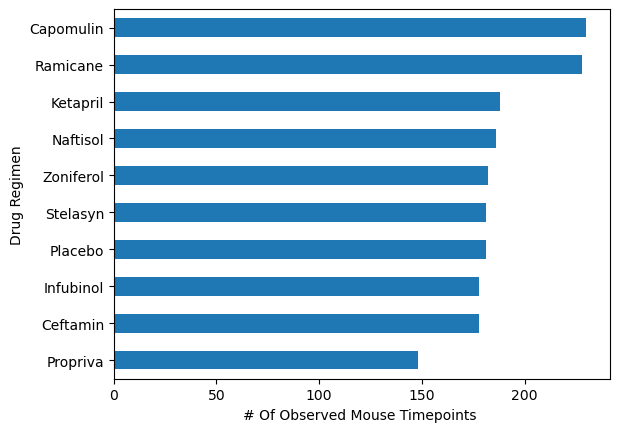

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_mouse_df.groupby('Drug Regimen')['Timepoint'].count().sort_values().plot(kind='barh', xlabel='# Of Observed Mouse Timepoints ')

plt.show()

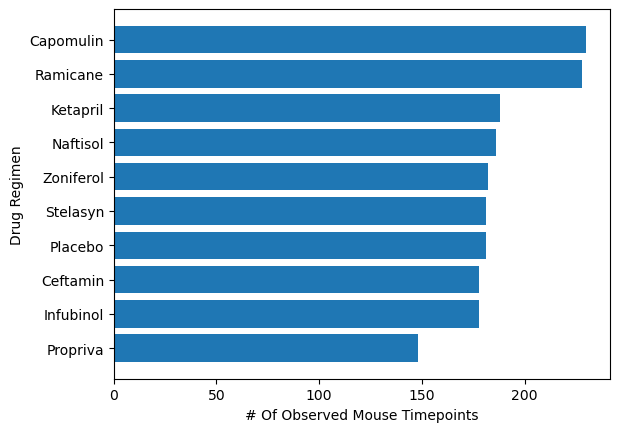

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = clean_mouse_df['Drug Regimen'].value_counts().sort_values().index
y_axis = clean_mouse_df['Drug Regimen'].value_counts().sort_values()

plt.barh(x_axis, y_axis)

plt.xlabel('# Of Observed Mouse Timepoints')
plt.ylabel('Drug Regimen')

plt.show()



125
123


<Axes: ylabel='Sex'>

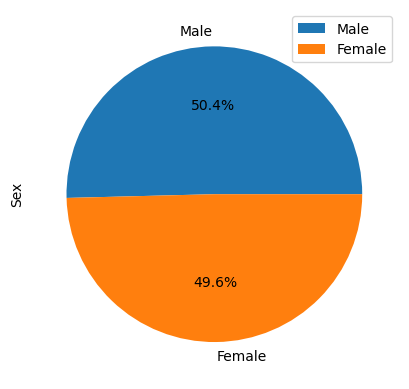

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas for IndividualMouse
males = clean_mouse_df[clean_mouse_df['Sex']=='Male']
males_tot = len(males.groupby('Mouse ID'))
print(males_tot)

fmales = clean_mouse_df[clean_mouse_df['Sex']=='Female']
fmales_tot = len(fmales.groupby('Mouse ID'))
print(fmales_tot)

sex = pd.DataFrame({'Sex': [males_tot,fmales_tot]}, index= ['Male', 'Female'])

sex.plot(kind='pie', y='Sex', autopct='%1.1f%%' )




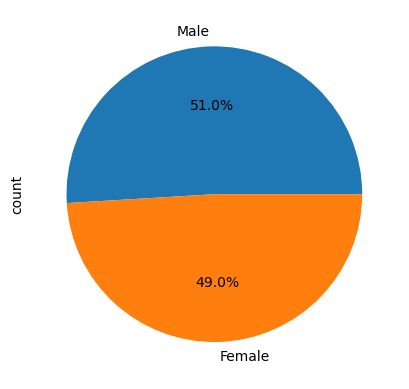

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas for Timepoint 
sex=clean_mouse_df['Sex'].value_counts()

sex.plot(kind='pie', autopct='%1.1f%%')

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
last_tp = clean_mouse_df.groupby('Mouse ID')[['Timepoint']].max()
#last_tp
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final = pd.merge(last_tp, clean_mouse_df, on=['Mouse ID','Timepoint'])
final = final[final['Drug Regimen'].isin(treatments)].reset_index()
final




,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,a203,45,67.973419,2,Infubinol,Female,20,23
1,1,a251,45,65.525743,1,Infubinol,Female,21,25
2,3,a275,45,62.999356,3,Ceftamin,Female,20,28
3,6,a411,45,38.407618,1,Ramicane,Male,3,22
4,7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...,...
95,238,y769,45,68.594745,4,Ceftamin,Female,6,27
96,239,y793,45,31.896238,2,Capomulin,Male,17,17
97,240,y865,45,64.729837,3,Ceftamin,Male,23,26
98,244,z578,45,30.638696,0,Ramicane,Male,11,16


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol={}


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
     # Locate the rows which contain mice on each drug and get the tumor volumes
    temp = final[final['Drug Regimen']== drug]
    values = temp['Tumor Volume (mm3)']
    # add subset 
    tumor_vol[drug] = values

    # Determine outliers using upper and lower bounds
    q1=values.quantile(.25)
    q3=values.quantile(.75)
    iqr = q3 - q1
    lowerb = q1 - 1.5*iqr
    upperb = q3 + 1.5*iqr

#Maybe save it to another list
    outliers_count = (values[values<=lowerb].count()) + (values[values>=upperb].count())
    lower_outliers_list =values[values <=lowerb]
    upper_outliers_list =values[values >=upperb]

    print(f'The IQR for {drug} is {iqr}')
    print(f'Lower bound for {drug}= {lowerb}' )
    print(f'Upper bound for {drug}= {upperb}')
    print(f'Number of Outliers for {drug}= {outliers_count}')

    if outliers_count !=0:
       print(f'Potencial Lower Outliers for {drug}= {lower_outliers_list.to_list()}')
       print(f'Potencial Upper Outliers for {drug}= {upper_outliers_list.to_list()}')
   

    
    

The IQR for Capomulin is 7.781863460000004
Lower bound for Capomulin= 20.70456164999999
Upper bound for Capomulin= 51.83201549
Number of Outliers for Capomulin= 0
The IQR for Ramicane is 9.098536719999998
Lower bound for Ramicane= 17.912664470000003
Upper bound for Ramicane= 54.30681135
Number of Outliers for Ramicane= 0
The IQR for Infubinol is 11.477135160000003
Lower bound for Infubinol= 36.83290494999999
Upper bound for Infubinol= 82.74144559000001
Number of Outliers for Infubinol= 1
Potencial Lower Outliers for Infubinol= [36.3213458]
Potencial Upper Outliers for Infubinol= []
The IQR for Ceftamin is 15.577752179999997
Lower bound for Ceftamin= 25.355449580000002
Upper bound for Ceftamin= 87.66645829999999
Number of Outliers for Ceftamin= 0


<Axes: title={'center': 'Tumor Volume (mm3)'}, xlabel='Drug Regimen'>

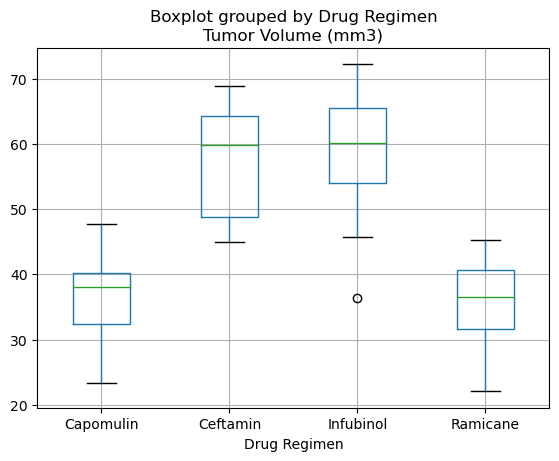

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
final.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen')

## Line and Scatter Plots

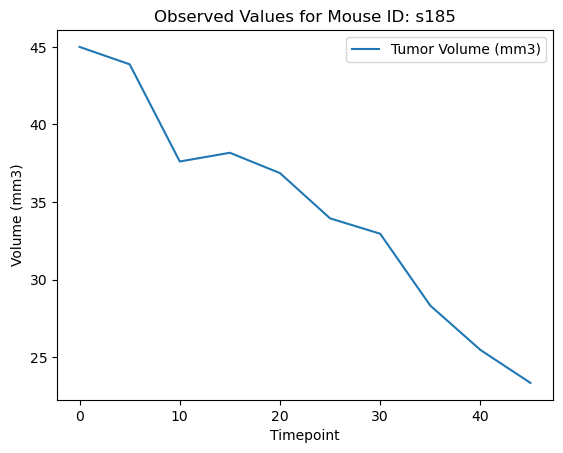

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse='s185'

indiv_mouse = clean_mouse_df[clean_mouse_df['Mouse ID']== mouse]

indiv_mouse[['Timepoint', 'Tumor Volume (mm3)']].set_index('Timepoint').plot(kind='line')

plt.title(f'Observed Values for Mouse ID: {mouse}')
plt.ylabel('Volume (mm3)')
plt.show()




In [18]:
indiv_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
10,s185,0,45.000000,0,Capomulin,Female,3,17
11,s185,5,43.878496,0,Capomulin,Female,3,17
12,s185,10,37.614948,0,Capomulin,Female,3,17
13,s185,15,38.177232,0,Capomulin,Female,3,17
14,s185,20,36.866876,0,Capomulin,Female,3,17
15,s185,25,33.949940,0,Capomulin,Female,3,17
16,s185,30,32.959671,1,Capomulin,Female,3,17
17,s185,35,28.328531,1,Capomulin,Female,3,17
18,s185,40,25.472143,1,Capomulin,Female,3,17
19,s185,45,23.343598,1,Capomulin,Female,3,17


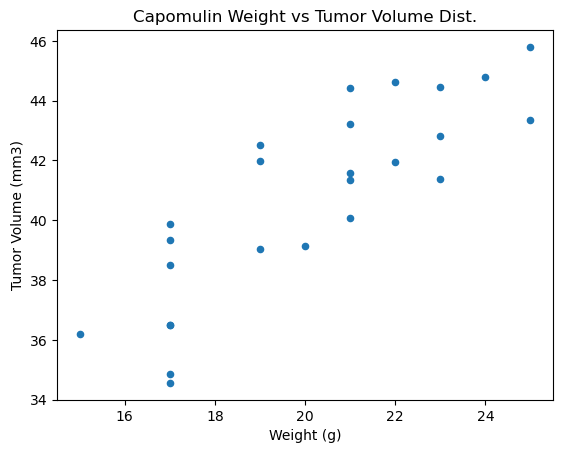

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_df = clean_mouse_df[clean_mouse_df['Drug Regimen']=='Capomulin']

capomulin_w_vs_tv = capomulin_df.groupby('Mouse ID').agg({'Tumor Volume (mm3)':'mean', 'Weight (g)': 'mean'})

capomulin_w_vs_tv.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')

plt.title('Capomulin Weight vs Tumor Volume Dist.')
plt.show()




## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and a linear regression model 

(b1 , b0 , r_value , p , std) = st.linregress(x = capomulin_w_vs_tv['Weight (g)'], y = capomulin_w_vs_tv['Tumor Volume (mm3)'])

print(f'The correlation coefficient is: {r_value}')
print(f'The model is: Tumor Volume = {round(b0,2)} + {round(b1,2)} Weight')


# for mouse weight and average observed tumor volume for the entire Capomulin regimen

predictions =  b0 + b1*capomulin_w_vs_tv['Weight (g)']



The correlation coefficient is: 0.8419363424694721
The model is: Tumor Volume = 21.55 + 0.95 Weight


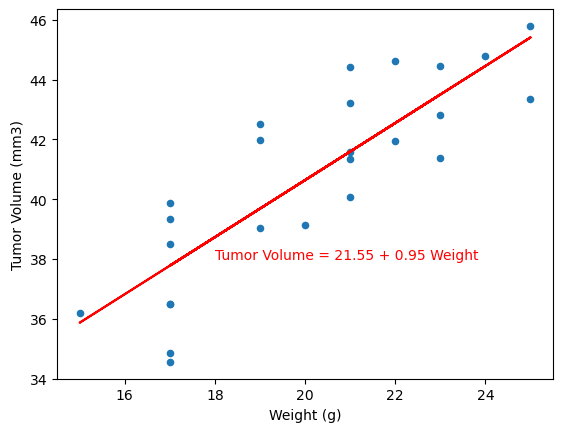

In [22]:
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_w_vs_tv.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')
plt.plot(capomulin_w_vs_tv['Weight (g)'], predictions, color='r')
plt.annotate(f'Tumor Volume = {round(b0,2)} + {round(b1,2)} Weight', (18,38),color = 'r')
plt.show()